<a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>

<h1 align=center><font size = 5>Regression - Univariate and Multivariate</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>October 3, 2024</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score

from sklearn.datasets import fetch_california_housing

Create a random dataset.

In [2]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

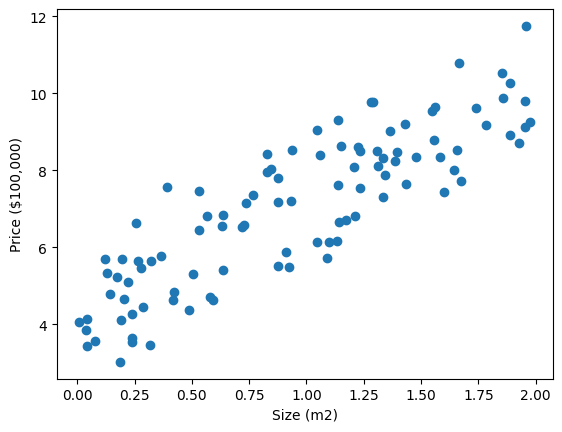

In [3]:
plt.scatter(X, y)
plt.xlabel('Size (m2)')
plt.ylabel('Price ($100,000)')
plt.show()

Split the dataset into training and test sets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normal Equation (Ordinary Least Squares)

In [5]:
model = LinearRegression()

In [6]:
model.fit(X_train, y_train)

LinearRegression()

Get the parameters (weight values)

In [7]:
weight_0 = model.intercept_  # this is the bias term (w_0)
weight_1 = model.coef_  # this is the slope (w_1)

In [8]:
print("Intercept (w_0): {}".format(weight_0))
print("Coefficient (w_1): {}".format(weight_1))

Intercept (w_0): [4.20634019]
Coefficient (w_1): [[2.9902591]]


Let's predict the values of the samples in the test set.

In [9]:
y_pred = model.predict(X_test)

In [10]:
len(y_pred)

20

In [11]:
y_pred

array([[ 8.3476823 ],
       [ 4.81662104],
       [10.04607379],
       [ 8.21710217],
       [ 8.19395067],
       [ 8.2839789 ],
       [ 6.96622591],
       [ 6.10804438],
       [ 8.94126619],
       [ 7.48852934],
       [ 8.8601208 ],
       [ 5.78851984],
       [ 7.82362983],
       [ 7.60586977],
       [ 6.11154761],
       [ 6.74001543],
       [ 5.89767238],
       [ 4.92517791],
       [ 7.60354103],
       [ 8.83665886]])

Plot the data and the regression line

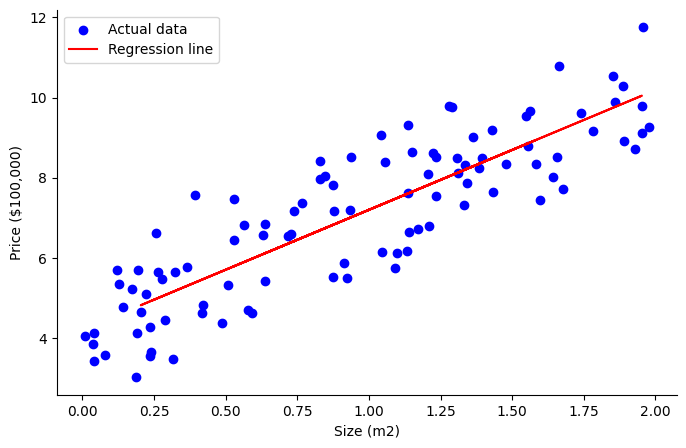

In [12]:
plt.figure(figsize=(8, 5))

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Size (m2)')
plt.ylabel('Price ($100,000)')
plt.legend()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Calculate mean squared error and R-squared.

In [13]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("Root Mean Squared Error: {}".format(rmse))
print("R-squared: {}".format(r2))

Root Mean Squared Error: 0.9579943877557056
R-squared: 0.6521157503858556


### Gradient Descent - StandardScaler

Visualize the distribution of the data.

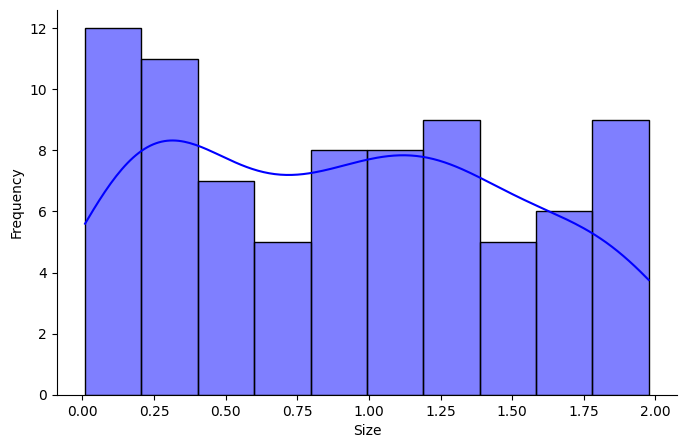

In [15]:
X_train_flattened = X_train.flatten()

plt.figure(figsize=(8, 5))
sns.histplot(X_train_flattened, bins=10, kde=True, color='blue')

plt.xlabel('Size')
plt.ylabel('Frequency')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Standardize the features.

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Visualize the distribution of the scaled data.

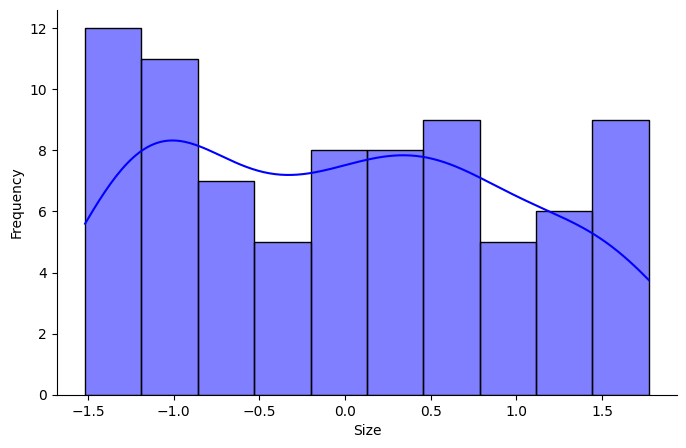

In [17]:
X_train_scaled_flattened = X_train_scaled.flatten()

plt.figure(figsize=(8, 5))
sns.histplot(X_train_scaled_flattened, bins=10, kde=True, color='blue')

plt.xlabel('Size')
plt.ylabel('Frequency')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Create an SGDRegressor model.

In [18]:
gradient_descent_model = SGDRegressor(max_iter=10000, tol=1e-3, eta0=0.01, random_state=42)

Fit the model to the training data

In [19]:
gradient_descent_model.fit(X_train_scaled, y_train.ravel())

SGDRegressor(max_iter=10000, random_state=42)

Get the parameters (w values).

In [20]:
gradient_descent_w_0 = gradient_descent_model.intercept_
gradient_descent_w_1 = gradient_descent_model.coef_

In [21]:
print("SGD Intercept (w_0): {}".format(gradient_descent_w_0))
print("SGD Coefficient (w_1): {}".format(gradient_descent_w_1))

SGD Intercept (w_0): [6.90341165]
SGD Coefficient (w_1): [1.77370923]


Retrieve the mean and standard deviation of the original training data.

In [22]:
X_mean = scaler.mean_  # mean of the original feature
X_std = scaler.scale_  # standard deviation of the original feature

Adjust the coefficients.

In [23]:
w_1_adjusted = gradient_descent_model.coef_ / X_std
w_0_adjusted = gradient_descent_model.intercept_ - (gradient_descent_model.coef_ * X_mean / X_std)

In [24]:
print("Adjusted Intercept (w_0): {}".format(w_0_adjusted))
print("Adjusted Coefficient (w_1): {}".format(w_1_adjusted))

Adjusted Intercept (w_0): [4.18492034]
Adjusted Coefficient (w_1): [2.96570634]


Let's predict the values of the samples in the test set.

In [25]:
y_pred_gradient_descent = gradient_descent_model.predict(X_test_scaled)

Calculate Mean Squared Error and R-squared for Gradient Descent.

In [26]:
rmse_gradient_descent = root_mean_squared_error(y_test, y_pred_gradient_descent)
r2_gradient_descent = r2_score(y_test, y_pred_gradient_descent)

In [27]:
print("Gradient Descent Root Mean Squared Error: {}".format(rmse_gradient_descent))
print("Gradient Descent R-squared: {}".format(r2_gradient_descent))

Gradient Descent Root Mean Squared Error: 0.9571927031530311
Gradient Descent R-squared: 0.6526977511906491


Plot the original data points and the best-fit line.

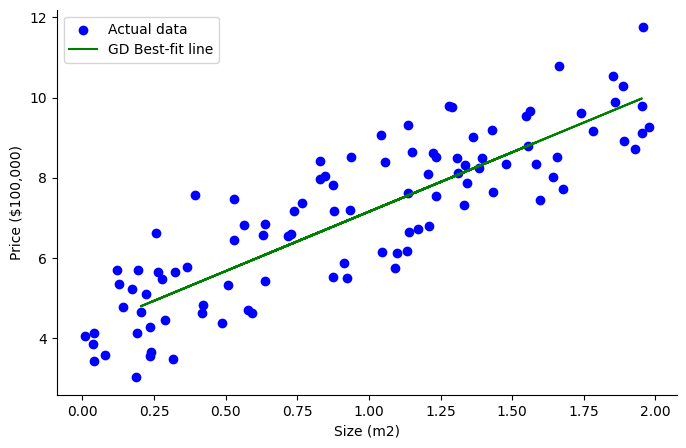

In [28]:
plt.figure(figsize=(8, 5))

plt.scatter(X, y, color='blue', label='Actual data')  # scatter plot of actual values
plt.plot(X_test, y_pred_gradient_descent, color='green', label='GD Best-fit line')  # best fit line from gradient descent
plt.xlabel('Size (m2)')
plt.ylabel('Price ($100,000)')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.show()

Plot both the original data and both regression lines (Gradient Descent and closed-form).

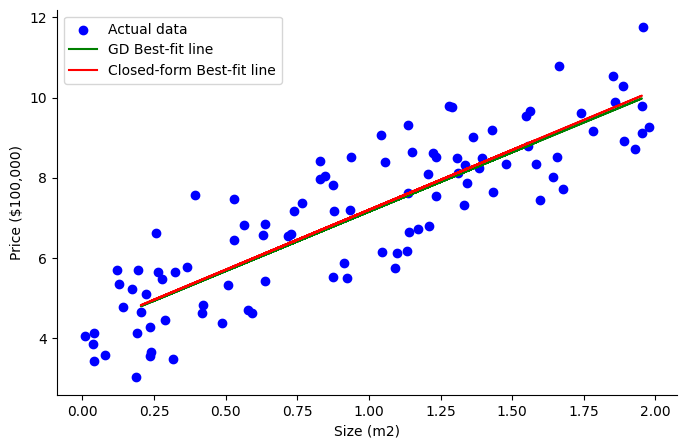

In [29]:
plt.figure(figsize=(8, 5))

plt.scatter(X, y, color='blue', label='Actual data')  # scatter plot of actual values
plt.plot(X_test, y_pred_gradient_descent, color='green', label='GD Best-fit line')  # best-fit line from gradient descent
plt.plot(X_test, y_pred, color='red', label='Closed-form Best-fit line')  # Best-fit line from closed-form

plt.xlabel('Size (m2)')
plt.ylabel('Price ($100,000)')
plt.legend()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Gradient Descent - MinMaxScaler

Define an instance of the MinMaxScaler.

In [30]:
## Add your code here
scaler = MinMaxScaler()

Scale the features.

In [31]:
## Add your code here
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Visualize the distribution of the scaled data.

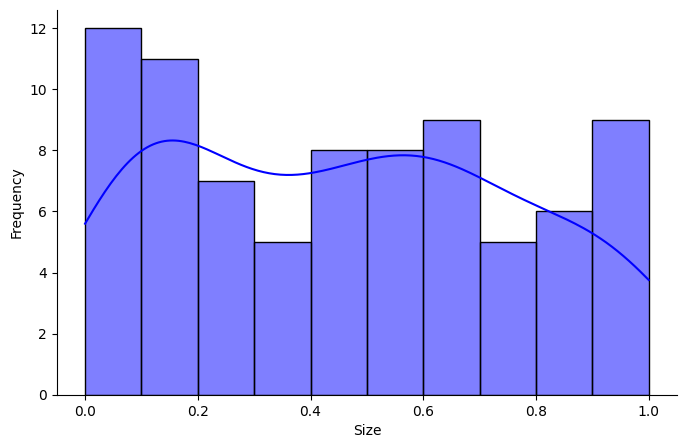

In [32]:
## Add your code here
X_train_scaled_flattened = X_train_scaled.flatten()

plt.figure(figsize=(8, 5))
sns.histplot(X_train_scaled_flattened, bins=10, kde=True, color='blue')

plt.xlabel('Size')
plt.ylabel('Frequency')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Create an SGDRegressor model.

In [33]:
## Add your code here.
gradient_descent_model = SGDRegressor(max_iter=10000, tol=1e-3, eta0=0.01, random_state=42)

Fit the model to the training data.

In [34]:
## Add your code here.
gradient_descent_model.fit(X_train_scaled, y_train.ravel())

SGDRegressor(max_iter=10000, random_state=42)

Get the parameters (w values).

In [35]:
## Add your code here
gradient_descent_w_0 = gradient_descent_model.intercept_
gradient_descent_w_1 = gradient_descent_model.coef_

Print the parameters.

In [36]:
## Add your code here
print("SGD Intercept (w_0): {}".format(gradient_descent_w_0))
print("SGD Coefficient (w_1): {}".format(gradient_descent_w_1))

SGD Intercept (w_0): [4.8594441]
SGD Coefficient (w_1): [4.632398]


What do you notice? Do you they look close to the ones that were estimated by the Linear Equation and GD using standardized features?

Retrieve the min and max of the original training data.

In [37]:
## Add your code here
data_min = scaler.data_min_
data_max = scaler.data_max_
data_range = data_max - data_min

Adjust the coefficients.

In [38]:
## Add your code here
adjusted_w_0 = gradient_descent_w_0 - (gradient_descent_w_1 * data_min / data_range)
adjusted_w_1 = gradient_descent_w_1 / data_range

Print the adjusted coefficients.

In [39]:
## Add your code here
print('Adjusted w_0: {}'.format(adjusted_w_0))
print('Adjusted w_1: {}'.format(adjusted_w_1))

Adjusted w_0: [4.83733188]
Adjusted w_1: [2.35463043]


Let's predict the values of the samples in the test set.

In [40]:
## Add your code here
y_pred_gradient_descent = gradient_descent_model.predict(X_test_scaled)

Calculate Mean Squared Error and R-squared for Gradient Descent.

In [41]:
## Add your code here
rmse_gradient_descent = root_mean_squared_error(y_test, y_pred_gradient_descent)
r2_gradient_descent = r2_score(y_test, y_pred_gradient_descent)

Print the evaluation metrics.

In [42]:
## Add your code here
print('The RMSE is: {}'.format(rmse_gradient_descent))
print('The R2 value is {}'.format(r2_gradient_descent))

The RMSE is: 0.9807345779430834
The R2 value is 0.6354040735646658


Plot the original data points and the best-fit line.

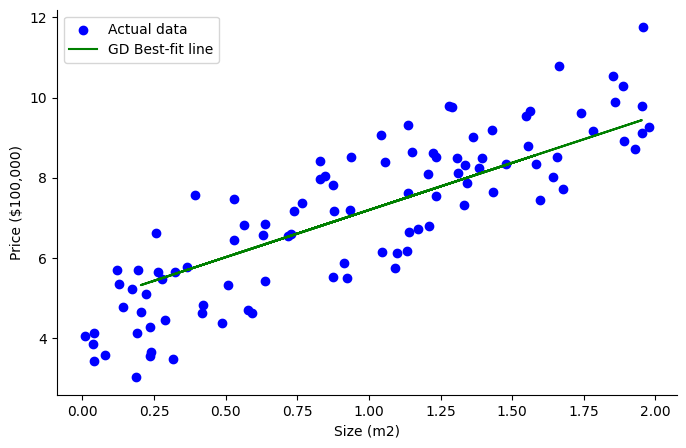

In [43]:
## Add your code here

plt.figure(figsize=(8, 5))

plt.scatter(X, y, color='blue', label='Actual data')  # scatter plot of actual values
plt.plot(X_test, y_pred_gradient_descent, color='green', label='GD Best-fit line')  # best fit line from gradient descent
plt.xlabel('Size (m2)')
plt.ylabel('Price ($100,000)')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.show()

Plot both the original data and both regression lines (Gradient Descent and closed-form).

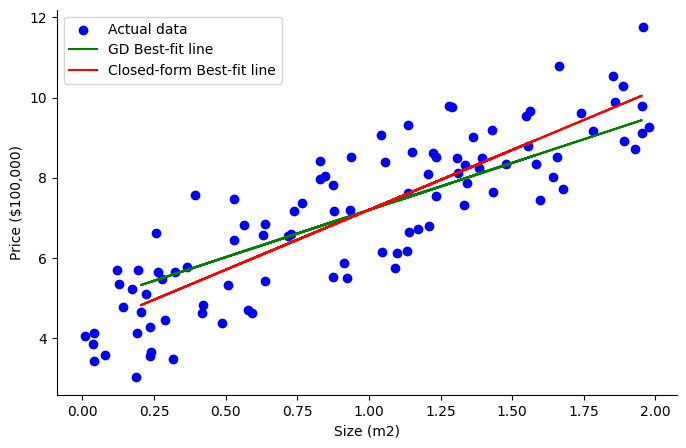

In [44]:
## Add your code here
plt.figure(figsize=(8, 5))

plt.scatter(X, y, color='blue', label='Actual data')  # scatter plot of actual values
plt.plot(X_test, y_pred_gradient_descent, color='green', label='GD Best-fit line')  # best-fit line from gradient descent
plt.plot(X_test, y_pred, color='red', label='Closed-form Best-fit line')  # Best-fit line from closed-form

plt.xlabel('Size (m2)')
plt.ylabel('Price ($100,000)')
plt.legend()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Plotting the Cost Function $J(w_0, w_1)$ Against Number of Iterations

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
gradient_descent_model = SGDRegressor(max_iter=10000, eta0=100, random_state=42)

In [47]:
costs = [] # list to store the cost function

n_iterations = 100  # limit to 100 iterations
check_interval = 5  # check cost every 5 iterations

for iteration in range(n_iterations):
    gradient_descent_model.partial_fit(X_train_scaled, y_train.ravel())

    if iteration % check_interval == 0:
        y_train_pred = gradient_descent_model.predict(X_train_scaled) # predict on training data

        cost = mean_squared_error(y_train, y_train_pred) # calculate the cost (mean squared error)
        costs.append(cost)
        print("Iteration {}: Cost = {}".format(iteration, cost))

Iteration 0: Cost = 1.3420169086335287e+27
Iteration 5: Cost = 2.8668916550155968e+26
Iteration 10: Cost = 2.583693683542582e+26
Iteration 15: Cost = 1.49772386555771e+25
Iteration 20: Cost = 5.621894357994325e+26
Iteration 25: Cost = 4.0861231774517164e+26
Iteration 30: Cost = 4.8106831955418894e+26
Iteration 35: Cost = 3.333723597862042e+26
Iteration 40: Cost = 3.5537311123599007e+26
Iteration 45: Cost = 1.829313055879054e+26
Iteration 50: Cost = 9.653189200698961e+25
Iteration 55: Cost = 1.0637878913402922e+25
Iteration 60: Cost = 7.326696296368794e+25
Iteration 65: Cost = 4.1562176917226805e+25
Iteration 70: Cost = 5.610668505679358e+25
Iteration 75: Cost = 7.419569438682141e+25
Iteration 80: Cost = 2.3914628610487366e+26
Iteration 85: Cost = 2.1583129046109853e+26
Iteration 90: Cost = 2.252134549125756e+25
Iteration 95: Cost = 3.5846436730217842e+25


Plot the cost function over iterations

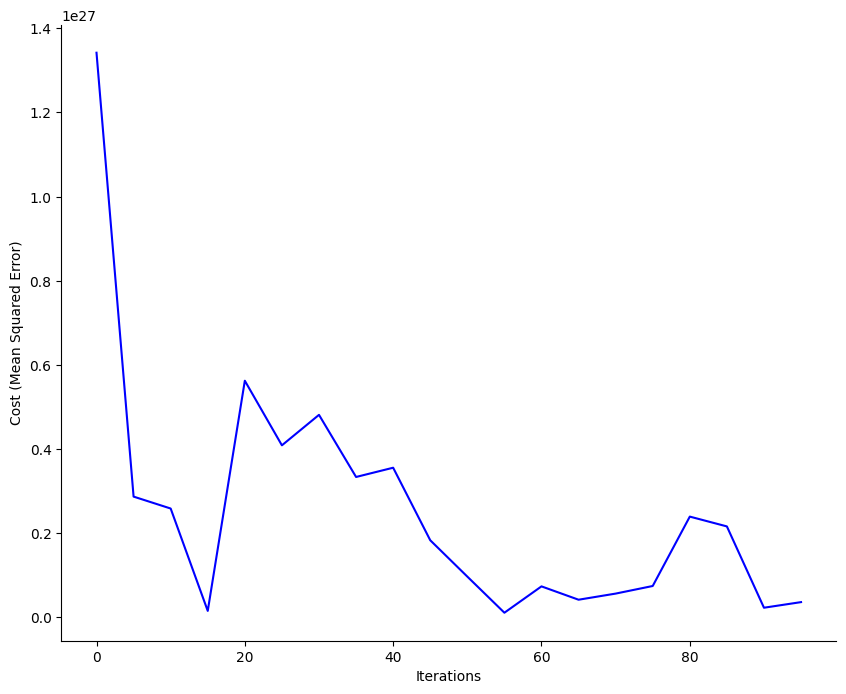

In [48]:
plt.figure(figsize=(10, 8))

plt.plot(range(0, n_iterations, check_interval), costs, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (Mean Squared Error)')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()